In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

In [40]:
# fetch dataset 
maternal_health_risk = fetch_ucirepo(id=863) 
  
# data (as pandas dataframes) 
X = maternal_health_risk.data.features 
y = maternal_health_risk.data.targets 

# create a dataframe to combine features and targets for plotting
df = pd.merge(X, y, left_index=True, right_index=True)
  

| Variable Name | Role     | Type     | Demographic | Description                                                                             | Units  | Missing Values |
|---------------|----------|----------|-------------|-----------------------------------------------------------------------------------------|--------|----------------|
| Age           | Feature  | Integer  | Age         | Any ages in years when a woman is pregnant.                                              |        | no             |
| SystolicBP    | Feature  | Integer  |             | Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.    | mmHg   | no             |
| DiastolicBP   | Feature  | Integer  |             | Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.    | mmHg   | no             |
| BS            | Feature  | Integer  |             | Blood glucose levels in terms of a molar concentration.                                  | mmol/L | no             |
| BodyTemp      | Feature  | Integer  |             | Body temperature in degrees Fahrenheit (F).                                              | F      | no             |
| HeartRate     | Feature  | Integer  |             | A normal resting heart rate.                                                             | bpm    | no             |
| RiskLevel     | Target   | Categorical |         | Predicted Risk Intensity Level during pregnancy considering the previous attribute.       |        | no             |


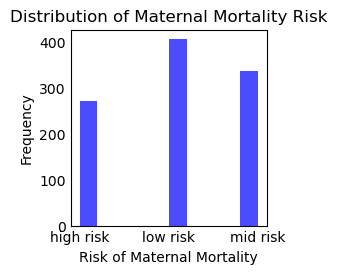

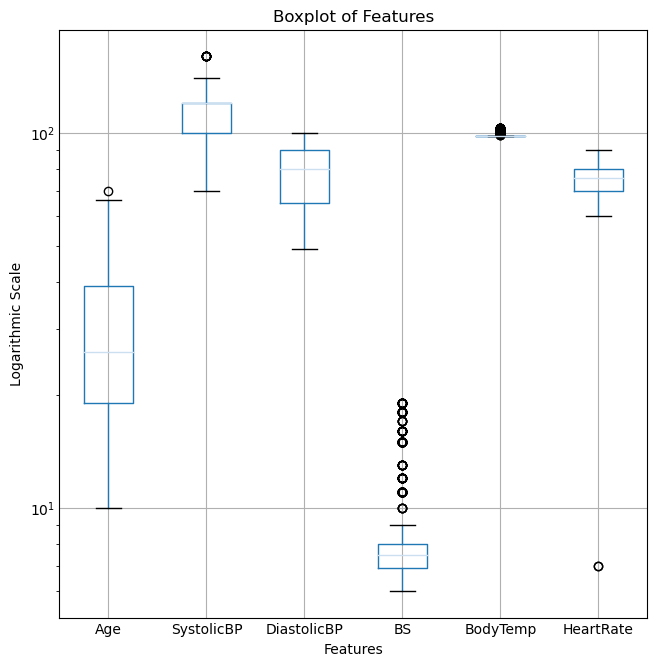

In [41]:
# plot histogram for the target variable
plt.style.use('_mpl-gallery-nogrid')
fig, ax = plt.subplots()
ax.hist(y, bins=10, color='blue', alpha=0.7)
ax.set_xlabel('Risk of Maternal Mortality')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Maternal Mortality Risk')
plt.show()

# plot boxplot for the features
fig, ax = plt.subplots(figsize=(6, 6))
df.boxplot(column=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], ax=ax)
ax.set_yscale('log')
ax.set_title('Boxplot of Features')
ax.set_ylabel('Logarithmic Scale')
ax.set_xlabel('Features')
ax.set_xticklabels(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'])
plt.show()

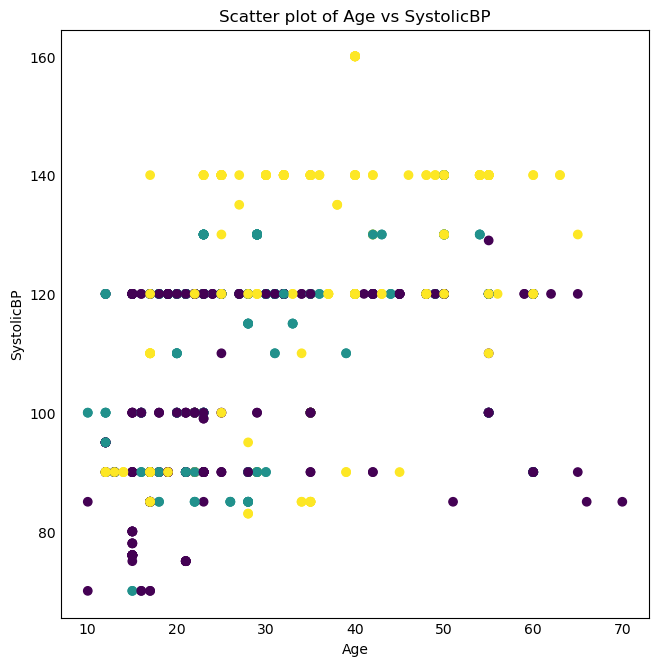

In [25]:
# Convert categorical values to numeric
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
y_numeric = y['RiskLevel'].map(risk_mapping)


# Plot scatter plot with numeric values
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x=X['Age'], y=X['SystolicBP'], c=y_numeric, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('SystolicBP')
ax.set_title('Scatter plot of Age vs SystolicBP')
plt.show()

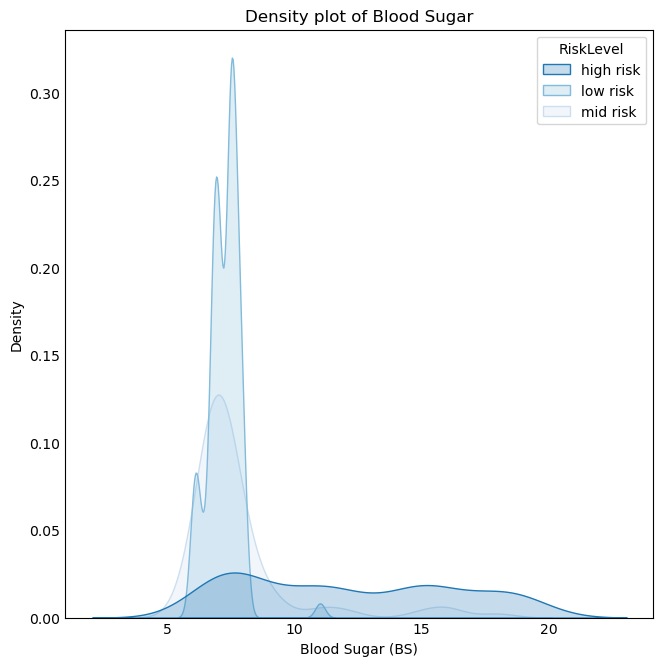

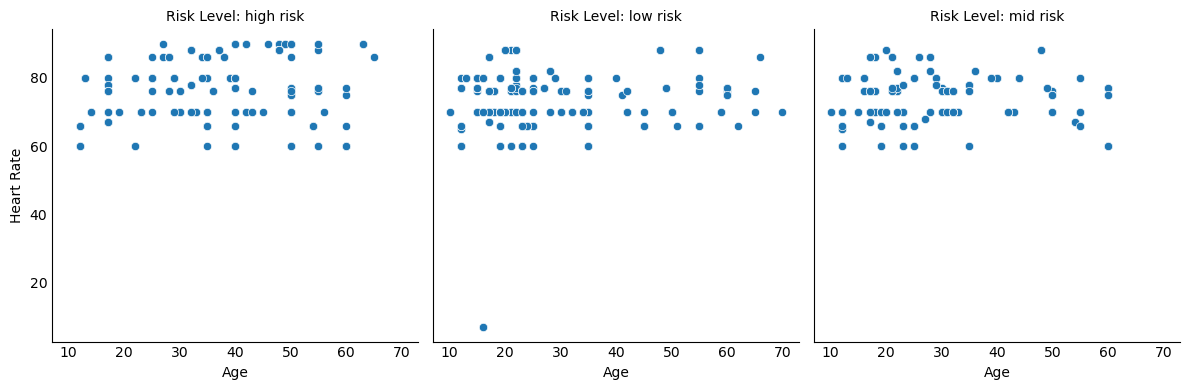

In [44]:
plt.figure(figsize=(6, 6))
sns.kdeplot(data=df, x='BS', hue='RiskLevel', fill=True)
plt.title('Density plot of Blood Sugar')
plt.xlabel('Blood Sugar (BS)')
plt.ylabel('Density')
plt.show()



g = sns.FacetGrid(data=df, col='RiskLevel', height=4, aspect=1)
g.map(sns.scatterplot, "Age", "HeartRate")
g.set_axis_labels("Age","Heart Rate")
g.set_titles(col_template="Risk Level: {col_name}")
plt.show()


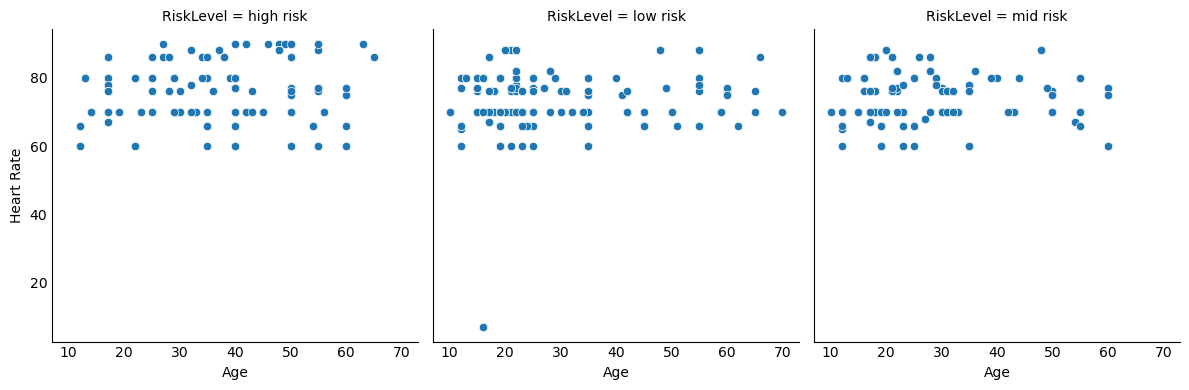